In [3]:
import os
from data.text_df_loader import load_text_df
import mxnet as mx
import matplotlib.pyplot as plt
from data.SpeechCorporaDAO import SpeechCorporaDAO
import os
from ast import literal_eval
import seaborn as sns
from data.TextFeaturesCache import TextFeaturesCache
from data.MelSpDAO import MelSpDAO
import numpy as np
from mxnet_model.word_pron_error_model.dataloader.WordPronErrorModelDataLoader import WordPronErrorModelDataLoader
from mxnet_model.word_pron_error_model.model.WordPronErrorModel import WordPronErrorModel
from mxnet_model.word_pron_error_model.pron_error_detection.WordPronErrorDetector import WordPronErrorDetector
from metrics.reports.print_phoneme_error_precision_recall_report import print_pron_error_precision_recall_report
from metrics.reports.plot_precision_recall_curve_for_word_pron_errors import plot_precision_recall_curve_for_word_pron_errors
from metrics.reports.add_precision_column_for_word_pron_errors import add_precision_column_for_word_pron_errors
import pandas as pd
from data.MelSpDAO import MelSpDAO
from data.SpeechCorporaDAO import SpeechCorporaDAO
import os
from ast import literal_eval
from ivona_tools.xivona.XIvona import XIvona
from data.TextFeaturesCache import TextFeaturesCache

In [4]:
# Load test data
pronunciation_model_dir = "/home/ec2-user/daniel/data/weekly-supervised-pronunciation-assessment"
speech_corpora_dir = os.path.join(pronunciation_model_dir, "speech_corpora")
#test_speech_corpora_file = "nina_en_us/text_phonemes_less_than_50_phonemes_test3.csv"
test_speech_corpora_file = "gut_isle/gut_isle_test_autoannotated_threshold_0_19.csv"
#test_speech_corpora_file = "elra_isle/elra_isle_test_autoannotated.csv"
#test_speech_corpora_file = "nina_train3_gut_train.csv"
#test_speech_corpora_file = "joanna_en_us/text_phonemes_less_than_50_phonemes_test.csv"
test_df, test_speech_corpora_dao = load_text_df(speech_corpora_dir, test_speech_corpora_file, max_texts_num=10000)

#test_df = test_df[test_df.corpus_name=="gut_isle"]
test_df['phoneme_annotated'] = np.random.randint(1, 2, len(test_df))
test_df['words_num'] = [len(word_pron_errors) for word_pron_errors in test_df.word_pron_errors]
test_df['pron_error_num'] = [sum(word_pron_errors) for word_pron_errors in test_df.word_pron_errors]
test_df = test_df[test_df.pron_error_num>0]
test_df = test_df[[text.count('_')==0 for text in test_df.text]]

print("test_df len=%d" % len(test_df))

#test_df[test_df.phonemes_to_say_len<15][test_df.phoneme_pron_error_num==0].head(20) # max words = 20

test_df len=583


In [51]:
analysis_df = test_df.copy()
#analysis_df[analysis_df.pron_error_num>0]
#analysis_df = analysis_df[analysis_df.xivona_to_say==analysis_df.xivona_spoken]
#analysis_df = analysis_df[[xivona_spoken.count("pau")>1 for xivona_spoken in analysis_df.xivona_spoken]]
#analysis_df[analysis_df.words_num<10]

text_id             wav_id  \
4872  ivona_set10_00829noerr  ivona_set10_00829   
5987   ivona_set1_01517noerr   ivona_set1_01517   
6804   ivona_set2_04895noerr   ivona_set2_04895   
7053   ivona_set1_02644noerr   ivona_set1_02644   
7409   ivona_set2_03686noerr   ivona_set2_03686   

                                           text speaker_id locale corpus_name  \
4872  all i can do, thank you, by mike's chair.       nina  en_us  nina_en_us   
5987                ow, a wild dog, he growled.       nina  en_us  nina_en_us   
6804                      i know, ales, i know.       nina  en_us  nina_en_us   
7053               gibe, mock, taunt, and jeer.       nina  en_us  nina_en_us   
7409  i know, pa, heck said with a faint smile.       nina  en_us  nina_en_us   

      is_l1                                      xivona_to_say  \
4872      1  ao1|l| ay1| k|ae1|n| d|uw1|pau| th|ae1|ng|k| j...   
5987      1  aw1|pau| ax| w|ay1|l|d| d|aa1|g|pau| hh|iy1| g...   
6804      1           ay1| n|ow1|pau| ey1|l|z|pau| ay1| n|ow1|   
7053      1  jh|ay1|b|pau| m|aa1|k|pau| t|ao1|n|t|pau| ae1|...   
7409      1  ay1| n|ow1|pau| p|aa1|pau| hh|eh1|k| s|eh1|d| ...   

                                          xivona_spoken  \
4872  ao1|l| ay1| k|ae1|n| d|uw1|pau| th|ae1|ng|k| j...   
5987  aw1|pau| ax| w|ay1|l|d| d|aa1|g|pau| hh|iy1| g...   
6804           ay1| n|ow1|pau| ey1|l|z|pau| ay1| n|ow1|   
7053  jh|ay1|b|pau| m|aa1|k|pau| t|ao1|n|t|pau| ae1|...   
7409  ay1| n|ow1|pau| p|aa1|pau| hh|eh1|k| s|eh1|d| ...   

                                    phoneme_pron_errors  \
4872  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5987  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6804                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
7053  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7409  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                 word_pron_errors  phoneme_annotated  words_num  \
4872  [0, 0, 0, 0, 0, 0, 0, 0, 0]                  1          9   
5987           [0, 0, 0, 0, 0, 0]                  1          6   
6804              [0, 0, 0, 0, 0]                  1          5   
7053              [0, 0, 0, 0, 0]                  1          5   
7409  [0, 0, 0, 0, 0, 0, 0, 0, 0]                  1          9   

      pron_error_num  
4872               0  
5987               0  
6804               0  
7053               0  
7409               0

In [18]:
# Load the model
model_params = {'dropout': 0.045451337147525035,
                'melsp_encoder_cnn_channels': 16,
                'melsp_encoder_gru_hidden_size': 128,
                'phonemes_encoder.dropout': 0.2
                }

#model_name="word_pron_error_test_wordindex_onehot_tftest_20000"
#model_name="word_pron_error_test_wordindex_onehot_tftest_l2test_iclude_l2train_in_train_20000"
#model_name="word_pron_error_test_wordindex_onehot_tftest_l2test_train_l1_all_l2_20000"
#model_name="word_pron_error_test_wordindex_onehot_tftest_l2test_iclude_test_train_l1_all_l2_threshold_079_20000"
#model_name="nina_train3_gut_train_gut_train_all_errors"
#model_name="word_pron_9_speaker_all_350000"
#model_name = "9_speaker_all_text_except_jennifer57K_timit_train_librittstrainclean100_train_l2train_l2testallerrors"
#model_name="9_speaker_all_text_except_jennifer57K_timit_train_librittstrainclean100_train_l2train_l2testallerrors_tuned_threshold_19"
#model_name="9_speaker_all_text_except_jennifer57K_timit_train_librittstrainclean100_train_l2train_l2testallerrors_tuned_elra"
model_name = "gut_isle_train_autoannotated_threshold_0_20"
model = WordPronErrorModel.load_model(
            model_name_to_load = model_name,
            model_name=model_name, 
            model_dir= "/home/ec2-user/daniel/data/weekly-supervised-pronunciation-assessment/model", 
            model_params = model_params, 
            phoneset_size = test_speech_corpora_dao.text_features_cache.phoneme_encoder_idx.phonemes_num,
                   epoch=12, 
            model_ctx=mx.gpu(1))

In [19]:
# Detect pronunciation errors and print metrics
test_dataloader = WordPronErrorModelDataLoader(test_df, test_speech_corpora_dao, batch_size=1, shuffle=False)

word_pron_error_result = WordPronErrorDetector().detect_word_pron_errors(
            test_dataloader, model, False)

test_df['word_pron_error_probs'] = [word_pron_error_probs.tolist() for word_pron_error_probs in word_pron_error_result.word_pron_error_probs_list]

print("word_pron_error_loss=%.4f" % np.mean(word_pron_error_result.word_pron_error_loss_list))

/home/ec2-user/anaconda3/envs/pron_model/lib/python3.7/site-packages/gluonnlp/data/batchify/batchify.py:228: UserWarning: Padding value is not given and will be set automatically to 0 in data.batchify.Pad(). Please check whether this is intended (e.g. value of padding index in the vocabulary).
  'Padding value is not given and will be set automatically to 0 '


word_pron_error_loss=0.6131


pron num=3790, pron error num=1107, pron pred error num=101
Precision=0.7822, (0.6944, 0.8540), Recall=0.0714 (0.0573, 0.0877), F1-score=0.1308)
AUC=0.5646


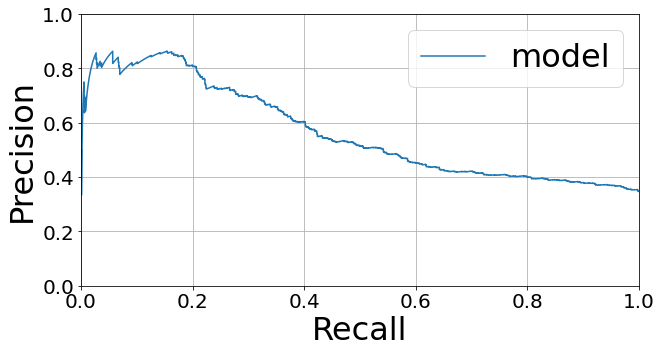

In [21]:
# analyze precision/recall
def clear_errors(word_pron_error_probs):
    word_error_probs_list=[]
    for index,word_error_prob in enumerate(word_pron_error_probs):
        new_word_error_prob = word_error_prob if index<6 else 0
        word_error_probs_list.append(new_word_error_prob)
    return word_error_probs_list

#test_df['word_pron_error_probs'] = [clear_errors(word_pron_error_probs) for word_pron_error_probs in test_df.word_pron_error_probs]


print_pron_error_precision_recall_report(test_df.word_pron_errors,test_df.word_pron_error_probs,threshold=0.5)

precision,recall,thresholds,auc_value,fig = plot_precision_recall_curve_for_word_pron_errors([test_df],['model'],32,20)

print("AUC=%s" % auc_value)

#test_df.to_csv('/home/ec2-user/daniel/data/weekly-supervised-pronunciation-assessment/is2020/weakly_gut_isle_trained_on_l2_only.csv',index=False)



In [23]:
#All cases analysis
analysis_df = test_df.copy()
analysis_df.word_pron_error_probs

add_precision_column_for_word_pron_errors(analysis_df,threshold=0.95)
analysis_df[analysis_df.corpus_name=="gut_isle"].sort_values(by='precision',ascending=True).head(10)

/home/ec2-user/daniel/weekly-supervised-pronunciation-assessment/src/metrics/calc_precision_score.py:21: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/home/ec2-user/anaconda3/envs/pron_model/lib/python3.7/site-packages/statsmodels/stats/proportion.py:86: RuntimeWarning: invalid value encountered in double_scalars
  q_ = count * 1. / nobs


text_id          wav_id  \
1    Speaker_6_040   Speaker_6_040   
2    Speaker_6_164   Speaker_6_164   
4   Speaker_12_128  Speaker_12_128   
7   Speaker_10_110  Speaker_10_110   
8   Speaker_12_157  Speaker_12_157   
10   Speaker_8_009   Speaker_8_009   
11   Speaker_6_063   Speaker_6_063   
12   Speaker_6_053   Speaker_6_053   
13   Speaker_9_097   Speaker_9_097   
15  Speaker_10_004  Speaker_10_004   

                                                 text  speaker_id locale  \
1                                      in the theatre   Speaker_6  en_us   
2   i would like to take a trip to wales for a wee...   Speaker_6  en_us   
4         when are they going to implement the scheme  Speaker_12  en_us   
7                                 he's a photographer  Speaker_10  en_us   
8   we're planning to travel to egypt for a week o...  Speaker_12  en_us   
10                                i said live not bed   Speaker_8  en_us   
11                                             a bean   Speaker_6  en_us   
12                                     a man's finger   Speaker_6  en_us   
13            what do you think of this advertisement   Speaker_9  en_us   
15                               i said late not site  Speaker_10  en_us   

   corpus_name  is_l1                                      xivona_to_say  \
1     gut_isle      0                    ih1|n| dh|ax| th|iy1|-ax|t|-er|   
2     gut_isle      0  ay1| w|uh1|d| l|ay1|k| t|uw| t|ey1|k| ax| t|r|...   
4     gut_isle      0  w|eh1|n| aa1|r| dh|ey1| g|ow1|-ih|ng| t|uw| ih...   
7     gut_isle      0           hh|iy1|z| ax| f|ax|-t|aa1|-g|r|ax|-f|er|   
8     gut_isle      0  w|ih1|r| p|l|ae1|n|-ih|ng| t|uw| t|r|ae1|v|-lx...   
10    gut_isle      0           ay1| s|eh1|d| l|ih1|v| n|aa1|t| b|eh1|d|   
11    gut_isle      0                                       ax| b|iy1|n|   
12    gut_isle      0                     ax| m|ae1|n|z| f|ih1|ng|-g|er|   
13    gut_isle      0  w|ah1|t| d|uw1| j|uw1| th|ih1|ng|k| ax|v| dh|i...   
15    gut_isle      0           ay1| s|eh1|d| l|ey1|t| n|aa1|t| s|ay1|t|   

   xivona_spoken                                phoneme_pron_errors  \
1           pau|                        [0, 0, 0, 0, 0, 0, 0, 0, 0]   
2           pau|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4           pau|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
7           pau|            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
8           pau|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
10          pau|            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
11          pau|                                       [0, 0, 0, 0]   
12          pau|                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
13          pau|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
15          pau|            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                        word_pron_errors  phoneme_annotated  words_num  \
1                              [0, 0, 1]                  1          3   
2   [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]                  1         12   
4               [0, 0, 1, 1, 0, 0, 0, 1]                  1          8   
7                              [0, 0, 1]                  1          3   
8      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]                  1         11   
10                       [0, 0, 1, 0, 0]                  1          5   
11                                [0, 1]                  1          2   
12                             [0, 0, 1]                  1          3   
13                 [0, 0, 0, 1, 0, 0, 1]                  1          7   
15                       [0, 1, 1, 0, 0]                  1          5   

    pron_error_num                              word_pron_error_probs  \
1                1  [0.006422495469450951, 0.30781906843185425, 0....   
2                3  [0.006347788032144308, 0.13393090665340424, 0....   
4                3  [0.006197270471602678, 0.13237693905830383, 0....   
7                1  [0.006243

In [8]:
analysis_df[analysis_df.text=="i said call not shall"]




text_id          wav_id                   text  speaker_id locale  \
200  Speaker_10_026  Speaker_10_026  i said call not shall  Speaker_10  en_us   
419   Speaker_6_026   Speaker_6_026  i said call not shall   Speaker_6  en_us   
728  Speaker_12_026  Speaker_12_026  i said call not shall  Speaker_12  en_us   

    corpus_name  is_l1                              xivona_to_say  \
200    gut_isle      0  ay1| s|eh1|d| k|ao1|l| n|aa1|t| sh|ae1|l|   
419    gut_isle      0  ay1| s|eh1|d| k|ao1|l| n|aa1|t| sh|ae1|l|   
728    gut_isle      0  ay1| s|eh1|d| k|ao1|l| n|aa1|t| sh|ae1|l|   

    xivona_spoken                      phoneme_pron_errors word_pron_errors  \
200          PAU|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  [0, 1, 0, 0, 0]   
419          PAU|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0, 1]   
728          PAU|  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0, 1]   

     phoneme_annotated  words_num  pron_error_num  \
200                  1          5               1   
419                  1          5               1   
728                  1          5               1   

                                 word_pron_error_probs word_pron_errors_pred  \
200  [2.7150327e-06, 0.85558003, 0.026693, 1.002140...       [0, 0, 0, 0, 1]   
419  [8.126936e-08, 1.7061053e-06, 0.06231967, 1.15...       [0, 0, 0, 0, 0]   
728  [2.9408415e-05, 0.005486123, 2.623011e-05, 8.6...       [0, 0, 0, 0, 1]   

     precision  
200        0.0  
419        NaN  
728        1.0

phoneme embeddings=[1.75, 13.94, 16.94, 17.04, 17.05, 17.04, 17.04, 17.0, 17.05]
word pron error=[0.01, 0.31, 0.62]
[['EH']]

phonemes_to_say=ih1|n| dh|ax| th|iy1|-ax|t|-er|
phonemes_to_say=in the theatre


text_id         wav_id            text speaker_id locale corpus_name  \
1  Speaker_6_040  Speaker_6_040  in the theatre  Speaker_6  en_us    gut_isle   

   is_l1                    xivona_to_say xivona_spoken  \
1      0  ih1|n| dh|ax| th|iy1|-ax|t|-er|          pau|   

           phoneme_pron_errors word_pron_errors  phoneme_annotated  words_num  \
1  [0, 0, 0, 0, 0, 0, 0, 0, 0]        [0, 0, 1]                  1          3   

   pron_error_num                              word_pron_error_probs  
1               1  [0.006422495469450951, 0.30781906843185425, 0....

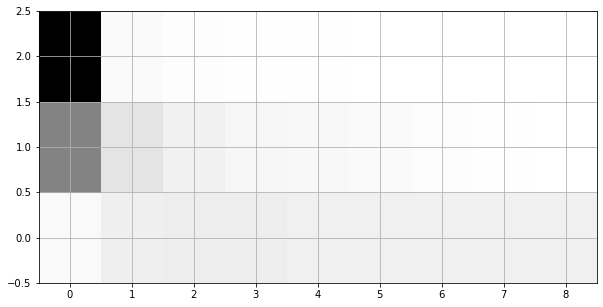

In [24]:
# Plot frame to phonemes attention

single_text_df = test_df.copy()[test_df.text_id=="Speaker_6_040"]

#single_text_df.xivona_to_say="ay1| n|ow1| ey1|l|z|pau| ay1| n|ow1|"
#single_text_df.word_pron_errors=[[0,0,0]]
single_melsp_dao = MelSpDAO(speech_corpora_dir)
single_text_features_cache = TextFeaturesCache.create(single_text_df)
single_speech_corpora_dao = SpeechCorporaDAO(single_melsp_dao, single_text_features_cache)

single_test_dataloader = WordPronErrorModelDataLoader(single_text_df, single_speech_corpora_dao, batch_size=1, shuffle=False)

word_pron_error_result = WordPronErrorDetector().detect_word_pron_errors(
            single_test_dataloader, model,False)

att_weights = model.frame_to_phoneme_att_weights_notf.asnumpy()[0,:,:]
att_weights.shape
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(att_weights, origin='lower', cmap='Greys', aspect='auto')
ax.grid()

att_weights = model.phoneme_to_word_att_weights.asnumpy()[0,:,:]
att_weights.shape
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(att_weights, origin='lower', cmap='Greys', aspect='auto')
ax.grid()

print("phoneme embeddings=%s" % [round(embedding,2) for embedding in word_pron_error_result.phonemes_to_say_acoustic_embeddings_list[0].squeeze().tolist()])

print("word pron error=%s" % [round(word_pron_error_prob,2) for word_pron_error_prob in word_pron_error_result.word_pron_error_probs_list[0]])

print(word_pron_error_result.recognized_phoneme_list)
print()
print("phonemes_to_say=%s" % single_text_df.iloc[0].xivona_to_say)
print("phonemes_to_say=%s" % single_text_df.iloc[0].text)
single_text_df


In [10]:
# Plot phonemes to words attention